### A fast implementation to model the change in Forex account balance

Input: 
- list of pips gains from trades as an array
- percentage of risk on a trade
- account balance

ToDo:
- leverage (currently it's 1:100)
- changing risk

In [37]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def model1(balance, risk, trades):
    N = balance
    history = np.zeros(len(trades)+1)
    history[0] = N
    for j,i in enumerate(trades):
        N += N*risk*i/100
        history[j+1] = N
    return(N,history)


In [3]:
model1(100,0.1,(100,10,0))


(111.1, array([100. , 110. , 111.1, 111.1]))

In [4]:
df = pandas.read_csv('quotes.csv', decimal=",")


In [5]:
trades = df['pips'].tolist()

In [6]:
trades = [float(i) for i in trades]

In [7]:
df1 = pandas.read_csv('quotes_week_all.csv',delimiter=";", decimal=",", )
df1 = df1.fillna(0)

In [23]:
trades1 = [float(i) for i in df1['pips1'].tolist()]
trades2 = [float(i) for i in df1['pips2'].tolist()]
#trades3 = [float(i) for i in df1['pips3'].tolist()]

In [5]:
model1(100,0.1,trades1)

(54.831167497527225,
 array([100.        ,  99.16      ,  98.376636  ,  97.64864889,
         96.49639484,  93.70764903,  92.41448347,  91.88772091,
         91.51098126,  90.78804451,  90.13437059,  90.65714993,
         92.80572439,  93.29759473,  93.73609342,  93.92356561,
         94.09262803,  94.33726886,  94.44103986,  94.62992194,
         94.68669989,  94.94235398,  95.04679057,  95.38895901,
         95.665587  ,  95.97171687,  94.85844496,  94.90587418,
         94.23204247,  93.71376624,  93.06714125,  91.7828147 ,
         90.15825888,  90.27546462,  90.24838198,  90.23935714,
         90.51007521,  90.59153428,  91.3072074 ,  91.47156038,
         91.54473762,  91.63628236,  92.26857271,  92.62842014,
         93.3694475 ,  93.39745834,  93.43481732,  94.07017408,
         94.16424425,  94.34315632,  94.35259063,  94.39976693,
         94.42808686,  94.53195775,  94.59813013,  94.07784041,
         94.47296734,  94.61467679,  94.65252266,  94.74717518,
         94.7471751

In [11]:
model1(100,0.1,trades2)

(92.59988224271149,
 array([100.        , 100.14      ,  99.799524  ,  99.26060657,
         99.01245505,  99.01245505,  98.72531893,  98.72531893,
         98.39952538,  98.39952538,  99.14736177,  98.31452394,
         97.44935613,  97.44935613,  97.44935613,  96.7574657 ,
         97.03806235,  96.47524159,  97.78730487,  96.92677659,
         95.88966008,  94.54720484,  93.7435536 ,  92.59988224,
         92.59988224,  92.59988224,  92.59988224,  92.59988224,
         92.59988224,  92.59988224,  92.59988224]))

In [11]:
hist3 = model1(100,0.1,trades3)[1]

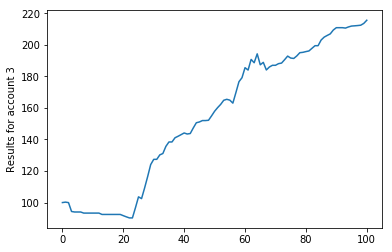

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist3)
plt.ylabel('Results for account 3')
plt.show()

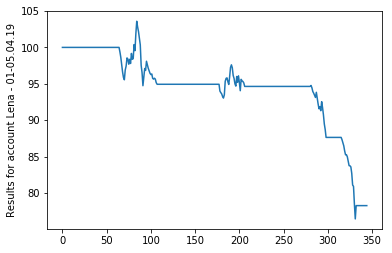

In [6]:
hist2 = model1(100,0.1,trades2)[1]
plt.plot(hist2)
plt.ylabel('Results for account Lena - 01-05.04.19')
plt.show()

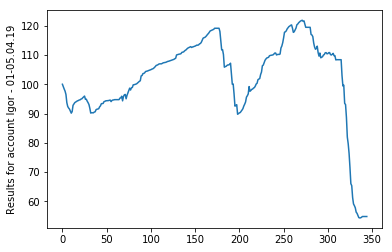

In [7]:
hist1 = model1(100,0.1,trades1)[1]
plt.plot(hist1)
plt.ylabel('Results for account Igor - 01-05.04.19')
plt.show()

In [33]:
#Building  histogram of returns for the last periods

#Deleting zeros from the data not to have large values at zero

trades1 = list(filter(lambda a: a != 0.0, trades1))
trades2 = list(filter(lambda a: a != 0.0, trades2))


In [47]:
#Removing the values out from three sigma

mean = np.mean(trades1)
std = np.std(trades1)
trades1 = list(filter(lambda a: ((a -mean)> - std*3) and ((a - mean)< std*3), trades1))
mean = np.mean(trades2)
std = np.std(trades2)
trades2 = list(filter(lambda a: ((a -mean)> - std*3) and ((a - mean)< std*3), trades2))

520
1.3336538461538459
11.568759412388001


D:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


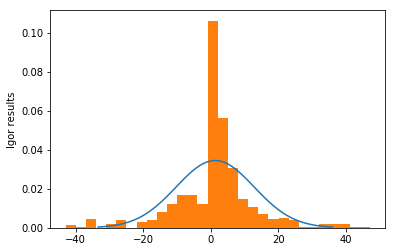

In [48]:
#Plot1

%matplotlib inline
mean = np.mean(trades1)
std = np.std(trades1)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, label = "Overlayed normal")
plt.hist(trades1, normed=True, bins=30)
plt.ylabel('Igor results');

print(len(trades1))
print(mean)
print(std)

119
-1.97563025210084
9.35234627808997


D:\programs\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


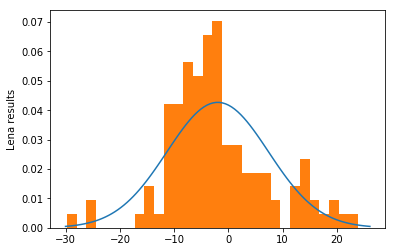

In [49]:
#Plot2

%matplotlib inline
mean = np.mean(trades2)
std = np.std(trades2)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, label = "Overlayed normal")
plt.hist(trades2, normed=True, bins=30)
plt.ylabel('Lena results');

print(len(trades2))
print(mean)
print(std)